# Test of boundary condition in fully Convective simulation

Here we compare two FC simulations with different boundary conditions

In [2]:
# Define paths of simulations to be compared
WORK_DIR = "/Volumes/LaCie/Simulations/mhd/"
PATH1 = WORK_DIR + "Nr15Ek5Ra7dS200Pm5-FC_bs_init0"    # Simulation with boundary condition S
PATH2 = WORK_DIR + "Nr15Ek5Ra7dS200Pm5-FC_bdsdr_init0" # Simulation with boundary condition ds/dr

In [3]:
# Read simulations' data
os.chdir(PATH1)
ts1 = MagicTs(field='par', all=True, iplot=False)
os.chdir(PATH2)
ts2 = MagicTs(field='par', all=True, iplot=False)

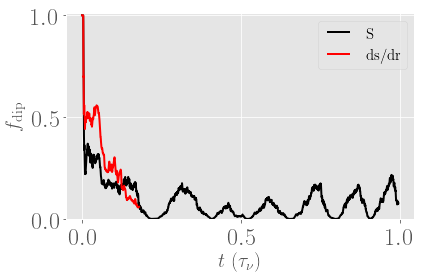

In [4]:
it1 = ts1.time.argsort()
it2 = ts2.time.argsort()
plt.plot(ts1.time[it1], ts1.dip_cmb[it1], 'k', label=r'S')
plt.plot(ts2.time[it2], ts2.dip_cmb[it2], 'r', label=r'ds/dr')
plt.ylabel(r'$f_\mathrm{dip}$', fontsize=20)
plt.xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
plt.ylim((0.,1.01))
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()


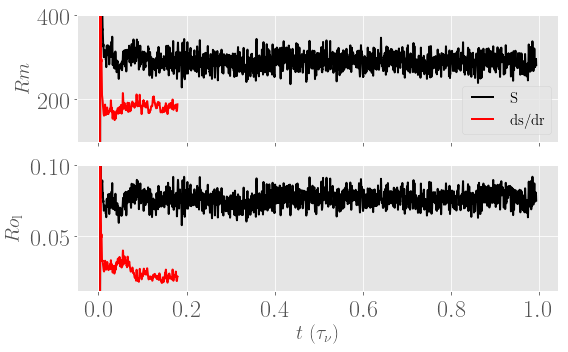

In [21]:
# Rescaling to match Gastine et al. 2012, their scale of reference is not the outer radius but the convective shell gap. 
scale = 0.4

fig, ax = plt.subplots(2, sharex=True, figsize=(8,5))
it1 = ts1.time.argsort()
it2 = ts2.time.argsort()
ax[0].plot(ts1.time[it1], ts1.rm[it1]*scale, 'k', label=r'S')
ax[0].plot(ts2.time[it2], ts2.rm[it2]*scale, 'r', label=r'ds/dr')
ax[1].plot(ts1.time[it1], ts1.rolc[it1]/scale, 'k')
ax[1].plot(ts2.time[it2], ts2.rolc[it2]/scale, 'r')
ax[0].set_ylabel(r'$Rm$', fontsize=20)
ax[1].set_ylabel(r'$Ro_\mathrm{l}$', fontsize=20)
plt.xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
#ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[0].set_ylim((100,400))
ax[1].set_ylim((0.012,0.10))
ax[0].legend(fontsize=15)
plt.tight_layout()
plt.show()

In [42]:
# Read simulations' data
os.chdir(PATH1)
ts1 = MagicTs(field='e_mag_oc', all=True, iplot=False)
os.chdir(PATH2)
ts2 = MagicTs(field='e_mag_oc', all=True, iplot=False)

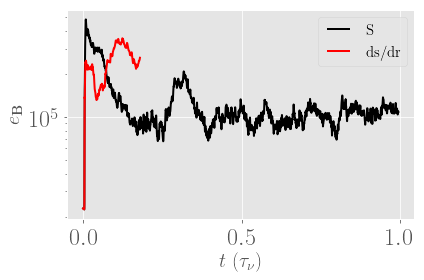

In [43]:
it1 = ts1.time.argsort()
it2 = ts2.time.argsort()
plt.plot(ts1.time[it1], ts1.emag_tot[it1], 'k', label=r'S')
plt.plot(ts2.time[it2], ts2.emag_tot[it2], 'r', label=r'ds/dr')
plt.ylabel(r'$e_\mathbf{B}$', fontsize=20)
plt.xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
plt.yscale('log')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

In [22]:
# Read simulations' data
os.chdir(PATH1)
rad1 = MagicRadial(field='parR', iplot=False)
os.chdir(PATH2)
rad2 = MagicRadial(field='parR', iplot=False)

(0.05, 0.3)

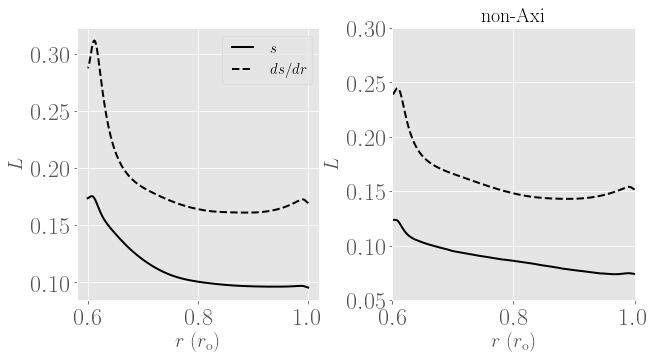

In [28]:
#Local flow length-scale (based on the mass-weighted velocity)
fig, ax = plt.subplots(1,2, figsize=(10,5), gridspec_kw={'wspace': 0.3})
ax[0].plot(rad1.radius, rad1.dlV, 'k', label=r'$s$')
ax[0].plot(rad2.radius, rad2.dlV, '--k', label=r'$ds/dr$')
ax[0].set_ylabel(r'$L$', fontsize=20)
ax[0].set_xlabel(r'$r \; (r_\mathrm{o})$', fontsize=20)
ax[0].set_xticks((0.6,0.8,1.))
ax[1].set_ylim((0.05, .30))
ax[0].legend(fontsize=15)


#Local flow length-scale based on the non-axisymmetric flow components (based on the RMS velocity)
ax[1].plot(rad1.radius, rad1.dlVc, 'k')
ax[1].plot(rad2.radius, rad2.dlVc, '--k')
ax[1].set_ylabel(r'$L$', fontsize=20)
ax[1].set_xlabel(r'$r \; (r_\mathrm{o})$', fontsize=20)
ax[1].set_title('non-Axi', fontsize=20)
ax[1].set_xlim((0.6, 1.))
ax[1].set_ylim((0.05, .30))
#ax[1].legend(fontsize=15)